<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import struct
import numpy as np
import matplotlib.pyplot as plt


First step: anlysing the original binary data files

**The data set used here is from [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)












In [0]:
def load_image(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_image, num_row, num_col = struct.unpack_from('>iiii', data, 0)
  offset = 16
  image_list = []
  for i in range(num_image):
    image = np.array(struct.unpack_from('>'+str(num_row*num_col)+'B', data, offset)).reshape(num_row,num_col)
    image_list.append(image)
    offset += int(num_row*num_col)
  return image_list

In [0]:
def load_label(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_label = struct.unpack_from('>ii', data, 0)
  offset = 8
  label_list = []
  for i in range(num_label):
    label = struct.unpack_from('>B', data, offset)
    label_list.append(label[0])
    offset += 1
  return label_list


In [0]:
image_train = load_image('train-images.idx3-ubyte')
label_train = load_label('train-labels.idx1-ubyte')
image_test = load_image('t10k-images.idx3-ubyte')
label_test = load_label('t10k-labels.idx1-ubyte')

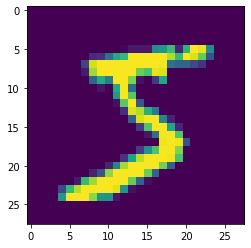

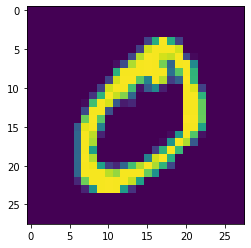

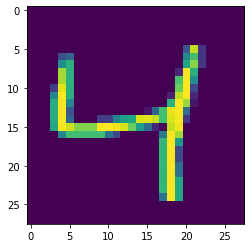

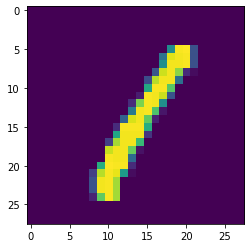

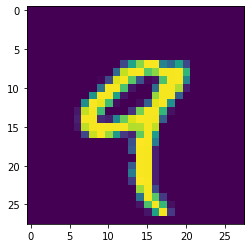

In [23]:
for i in range(5):
  plt.imshow(image_train[i])
  plt.show()

In [24]:
label_train[0:5]

[5, 0, 4, 1, 9]

In [0]:
def nearest_neighbor_method(test_image, template_image, template_label):
  distance_from_classes = [0 for i in range(10)]
  class_iterator = 0
  for i in range(len(template_image)):
    class_iterator = template_label[i]
    square_distance = sum(np.square(template_image[i].flatten() - test_image.flatten()))
    if square_distance < distance_from_classes[class_iterator] or distance_from_classes[class_iterator] == 0:
      distance_from_classes[class_iterator] = square_distance
  result = distance_from_classes.index(min(distance_from_classes))
  return result

In [65]:
nearest_neighbor_method(image_test[59], image_train, label_train)

5

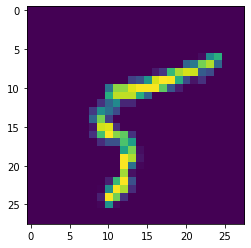

In [64]:
plt.imshow(image_test[59])

In [0]:
correct = 0
incorrect = 0
for i in range(len(image_test):
